### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**The independant value : Congruncy of word and color.**



**The dependant value : The time taken to read the list of words.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_0: Time   Read  Congrant >= Time    Read  Incongrant $$  




$$H_1: Time    Read  Congrant < Time    Read  Incongrant $$  

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [13]:
# Import Libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# Import Dataset
df= pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
#OverView on dataset
df.info()

# Statistical Overview on dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


*Answer Q3*



**From what we can see from our sample is that the mean 𝑇𝑖𝑚𝑒𝑅𝑒𝑎𝑑𝐶𝑜𝑛𝑔𝑟𝑎𝑛𝑡 is 14.05 sec while the mean for 𝑇𝑖𝑚𝑒𝑅𝑒𝑎𝑑𝐼𝑛𝑐𝑜𝑛𝑔𝑟𝑎𝑛𝑡 is 22.01**



**Also the standard deviation for TRC is less than this of 𝑇𝑖𝑚𝑒𝑅𝑒𝑎𝑑𝐼𝑛𝑐𝑜𝑛𝑔𝑟𝑎𝑛𝑡  at 3.56 and 4.79 respectively.**

In [3]:
# Compute Read time mean for Congruent
con_mean = df['Congruent'].mean()

# Display Read time mean
con_mean

14.051124999999999

In [4]:
# Compute Read time mean for Incongruent
incon_mean = df['Incongruent'].mean()


# Display Read time mean
incon_mean 

22.015916666666666

In [5]:
#Compute Observed Difference for the phenomenon

obs_diff = incon_mean- con_mean

# Display observed difference in completion rates
obs_diff

7.9647916666666667

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

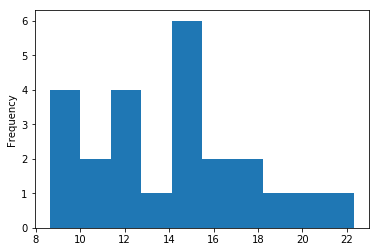

In [6]:
# Build the visualizations for Congruent

df["Congruent"].plot.hist();

**From what's noticed in this graph is that the spread for Congruent reads is wide but the most values are around 15 secs**

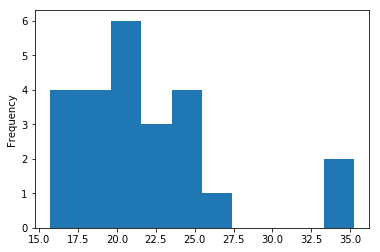

In [7]:
# Build the visualizations for Incongruent
df["Incongruent"].plot.hist();

**From what's noticed in this graph is that the spread for Incongruent reads is narrow and the most values are around 20 secs.**


**There are also some outliers around 35 secs**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**Statistical Test**

Since we don't have the population's standard divitation and our sample size is less than 30, It's better to run a T-Test rather than a Z-Test.                              
"Referring to Ref(1)"

and since we want to check whether our 𝐶𝑜𝑛𝑔𝑟𝑎𝑛𝑡 group took  less time than the 𝐼𝑛𝑐𝑜𝑛𝑔𝑟𝑎𝑛𝑡 group it's better to run a one-Tailed T-Test.                                     
"Referring to Ref(2)"

In [9]:
#Sample size
print(df['Congruent'].size)
print(df['Incongruent'].size)

24
24


In [10]:
#Referring to the t-table of critical values "in Ref3" 
#that for a 95% confidence level and 23 degrees of freedom "sample-size -1".
t_critical = 1.714

In [12]:
#Retreaving the difference between the means of the two groups from Q3
print(obs_diff)

7.96479166667


In [16]:
# To find the standard diviation of the differences between the groups
diff_df= df['Congruent'] - df['Incongruent']
diff_std= diff_df.std(axis=0)
print(diff_std)

4.86482691036


In [17]:
# Find t-statistic
obs_diff/(diff_std / math.sqrt(24))

8.020706944109957

**Result**

Our t-statistic (8.02) is greater than our critical value (1.7139),So we **reject the null hypothesis.** 
and confirms that 

**$$H_1: Time    Read  Congrant < Time    Read  Incongrant $$**


**Solving Question 5 using bootstrapping**

In [5]:
# Create sampling distribution for with boostrapping
bootmeans_con=[]
bootmeans_inc=[]

for _ in range(10000):
    bootsample= df.sample(10, replace = True)
    bootmeans_con.append(np.mean(bootsample["Congruent"]))
    bootmeans_inc.append(np.mean(bootsample["Incongruent"]))
    

In [6]:
#difference in mean of the reading times of each state
diffs=[]
bootmeans_inc = np.array(bootmeans_inc)
bootmeans_con = np.array(bootmeans_con)
diffs.append(bootmeans_inc-bootmeans_con)

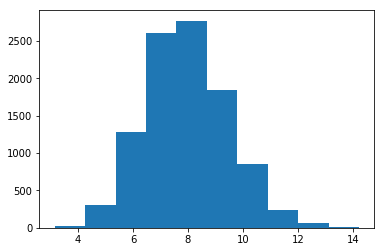

In [7]:
# plot distribution
plt.hist(diffs);

In [17]:
# convert to numpy array
diffs = np.array(diffs)

In [18]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

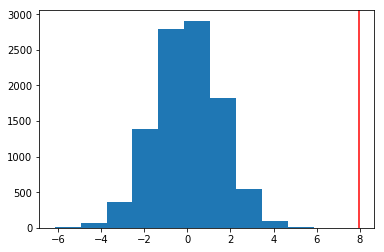

In [19]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [22]:
# compute p value
(null_vals > obs_diff).mean()

0.0


**From what's shown above, as the P value is less than Alpha (0.05) we reject the null hypotheses.and confirm that as per the alternate hypotheses Which matches up with what we expected that**

**$$H_1: Time    Read  Congrant < Time    Read  Incongrant $$**

**Refrences**

1- Choosing which statistical test to run:
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/


2- Choosing T-Test Type:
https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/


3- How to run the T-Test using Python and T-Table:
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f